In [1]:
#import required package
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
plt.rcParams["figure.figsize"] =(12,10)

In [2]:
# load 1 million records
transportation = pd.read_csv('Ride Sharing\Transportation.csv', nrows = 1000000)


In [3]:
# Check the data type of each feature
transportation.dtypes

Trip ID                        object
Trip Start Timestamp           object
Trip End Timestamp             object
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tip                             int64
Additional Charges            float64
Trip Total                    float64
Shared Trip Authorized           bool
Trips Pooled                    int64
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location       object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid Location      object
dtype: object

In [4]:
#Check the first 5 entries
transportation.head(5)

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,022ad3b7f1320d4e52cce3d5931eb0a0cee16c48,11/01/2018 08:45:00 AM,11/01/2018 09:30:00 AM,3140.0,38.5,NaN,1.703198e+10,NaN,56.0,47.5,...,9.1,66.6,False,1,NaN,NaN,NaN,41.785999,-87.750934,POINT (-87.7509342894 41.785998518)
1,0377167460a4d5d5e015c642b460e56ac88dab71,11/01/2018 02:00:00 AM,11/01/2018 02:15:00 AM,1031.0,5.3,NaN,NaN,70.0,NaN,10.0,...,2.5,12.5,False,1,41.745758,-87.708366,POINT (-87.7083657043 41.7457577128),NaN,NaN,NaN
2,03a2ac30a46af881e6a2e6af06a3a779b67c0802,11/01/2018 08:15:00 PM,11/01/2018 09:15:00 PM,4125.0,49.9,1.703108e+10,NaN,8.0,NaN,62.5,...,3.8,66.3,False,1,41.892042,-87.631864,POINT (-87.6318639497 41.8920421365),NaN,NaN,NaN
3,03fe17b0509941aa04744e9e4478ed5ded56b2eb,11/01/2018 03:45:00 AM,11/01/2018 04:15:00 AM,1229.0,11.7,1.703183e+10,NaN,22.0,NaN,7.5,...,2.5,10.0,True,3,41.916005,-87.675095,POINT (-87.6750951155 41.9160052737),NaN,NaN,NaN
4,040590c0bf5b22f8ccf7d8f19873c612bebfd480,11/01/2018 05:00:00 PM,11/01/2018 06:00:00 PM,3383.0,12.3,NaN,1.703184e+10,NaN,32.0,27.5,...,2.5,30.0,False,1,NaN,NaN,NaN,41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)


In [5]:
#Check the last 5 entries
transportation.tail(5)

,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,...,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
999995,101bd5c1dff64ce1ad54f7b458d3b9ebc2386775,11/09/2018 07:15:00 PM,11/09/2018 07:30:00 PM,308.0,0.9,1.703184e+10,1.703131e+10,28.0,31.0,0.0,...,2.5,2.5,True,3,41.867902,-87.642959,POINT (-87.6429586652 41.8679024175),41.856144,-87.648978,POINT (-87.6489783241 41.8561441046)
999996,101bd5c64edd7e3465dd8a81d8bd7be8b459e2bf,11/13/2018 07:30:00 AM,11/13/2018 07:45:00 AM,958.0,3.9,NaN,NaN,70.0,65.0,7.5,...,2.5,10.0,True,1,41.745758,-87.708366,POINT (-87.7083657043 41.7457577128),41.769778,-87.726930,POINT (-87.7269298425 41.7697780588)
999997,101bd5c780d43b17af6638951b6281224141d5e0,11/17/2018 02:45:00 AM,11/17/2018 02:45:00 AM,656.0,3.1,1.703107e+10,1.703116e+10,7.0,16.0,7.5,...,2.5,10.0,False,1,41.928967,-87.656157,POINT (-87.6561568309 41.9289672664),41.950404,-87.702007,POINT (-87.7020071282 41.95040441070001)
999998,101bd935121e588c0d0279242cb4393a68700b00,11/24/2018 08:30:00 PM,11/24/2018 08:45:00 PM,385.0,1.2,1.703108e+10,1.703108e+10,8.0,8.0,7.5,...,2.8,13.3,False,1,41.893216,-87.637844,POINT (-87.6378442095 41.8932163595),41.900221,-87.629105,POINT (-87.6291051864 41.9002212967)
999999,101bd99e7c80a96402c3a366e793a9ba9b8c770d,11/02/2018 02:15:00 AM,11/02/2018 02:15:00 AM,483.0,3.1,1.703183e+10,1.703124e+10,28.0,24.0,7.5,...,2.5,10.0,False,1,41.885281,-87.657233,POINT (-87.6572331997 41.8852813201),41.899507,-87.679600,POINT (-87.6796002867 41.8995065476)


In [6]:
# Select leave out the spatial related features.
transportation_selected = transportation[['Trip Start Timestamp', 'Trip End Timestamp', 'Trip Seconds', 'Trip Miles', 'Pickup Community Area','Dropoff Community Area', 'Fare','Shared Trip Authorized','Trips Pooled'] ]

In [7]:
#Check the dataset after selection
transportation_selected.head(5)

,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Community Area,Dropoff Community Area,Fare,Shared Trip Authorized,Trips Pooled
0,11/01/2018 08:45:00 AM,11/01/2018 09:30:00 AM,3140.0,38.5,NaN,56.0,47.5,False,1
1,11/01/2018 02:00:00 AM,11/01/2018 02:15:00 AM,1031.0,5.3,70.0,NaN,10.0,False,1
2,11/01/2018 08:15:00 PM,11/01/2018 09:15:00 PM,4125.0,49.9,8.0,NaN,62.5,False,1
3,11/01/2018 03:45:00 AM,11/01/2018 04:15:00 AM,1229.0,11.7,22.0,NaN,7.5,True,3
4,11/01/2018 05:00:00 PM,11/01/2018 06:00:00 PM,3383.0,12.3,NaN,32.0,27.5,False,1


In [8]:
#Check again the data types
transportation_selected.dtypes

Trip Start Timestamp       object
Trip End Timestamp         object
Trip Seconds              float64
Trip Miles                float64
Pickup Community Area     float64
Dropoff Community Area    float64
Fare                      float64
Shared Trip Authorized       bool
Trips Pooled                int64
dtype: object

In [9]:
#Find out how many NaN values in the dataset
transportation_selected.isnull().sum()

Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                155
Trip Miles                    0
Pickup Community Area     75005
Dropoff Community Area    84427
Fare                          4
Shared Trip Authorized        0
Trips Pooled                  0
dtype: int64

In [10]:
#Imputation performed. Impute the missing values with mean of the data for continues numerical data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
columns_to_impute = ['Trip Seconds','Fare']
transportation_selected[columns_to_impute] = Imputer().fit_transform(transportation_selected[columns_to_impute])

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\yunin\Anacon

In [11]:
# Check number of missing values again. 
transportation_selected.isnull().sum()

Trip Start Timestamp          0
Trip End Timestamp            0
Trip Seconds                  0
Trip Miles                    0
Pickup Community Area     75005
Dropoff Community Area    84427
Fare                          0
Shared Trip Authorized        0
Trips Pooled                  0
dtype: int64

In [12]:
# for Pickup Community Area and Dropoff Community Area, replace NaN with 0 as this should be considered as a discrete numerical values
transportation_selected['Pickup Community Area'] = transportation_selected['Pickup Community Area'].replace('nan', np.nan).fillna(0)
transportation_selected['Dropoff Community Area'] = transportation_selected['Dropoff Community Area'].replace('nan', np.nan).fillna(0)


C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
# final check of the data set for missing values. 
transportation_selected.isnull().sum()

Trip Start Timestamp      0
Trip End Timestamp        0
Trip Seconds              0
Trip Miles                0
Pickup Community Area     0
Dropoff Community Area    0
Fare                      0
Shared Trip Authorized    0
Trips Pooled              0
dtype: int64

In [14]:
# convert Time features to datetime 
transportation_selected['Trip Start Timestamp']= pd.to_datetime(transportation_selected['Trip Start Timestamp'])
transportation_selected['Trip End Timestamp']= pd.to_datetime(transportation_selected['Trip End Timestamp'])

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
transportation_selected['Pickup Community Area'] =transportation_selected['Pickup Community Area'] .astype('category')
transportation_selected['Dropoff Community Area'] =transportation_selected['Dropoff Community Area'] .astype('category')


C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
pd.options.display.float_format = '{:,.2f}'.format
transportation_selected.describe()

,Trip Seconds,Trip Miles,Fare,Trips Pooled
count,"1,000,000.00","1,000,000.00","1,000,000.00","1,000,000.00"
mean,"1,092.39",6.21,11.43,1.28
std,793.92,7.07,10.03,0.70
min,0.00,0.00,0.00,1.00
25%,539.00,1.80,5.00,1.00
50%,873.00,3.60,7.50,1.00
75%,"1,421.00",7.70,12.50,1.00
max,"47,760.00",273.60,700.00,12.00


In [17]:
transportation_selected.rename(columns={'Trip Seconds': 'Trip_seconds', 'Trip Miles': 'Trip_miles'}, inplace=True)

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [18]:
transportation_selected.dtypes

Trip Start Timestamp      datetime64[ns]
Trip End Timestamp        datetime64[ns]
Trip_seconds                     float64
Trip_miles                       float64
Pickup Community Area           category
Dropoff Community Area          category
Fare                             float64
Shared Trip Authorized              bool
Trips Pooled                       int64
dtype: object

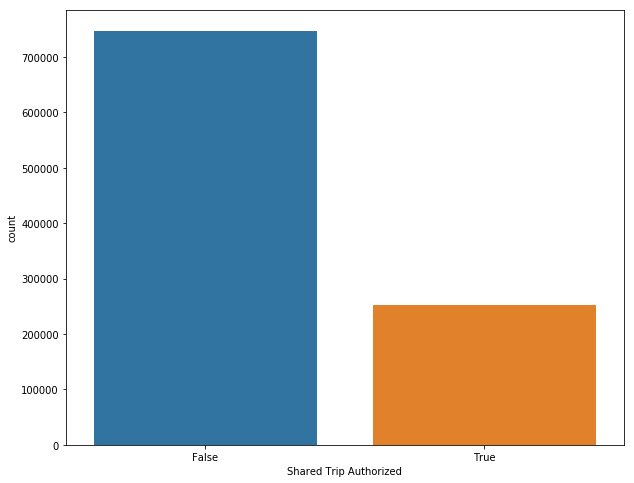

In [19]:
ax = sns.countplot(x= 'Shared Trip Authorized', data=transportation_selected)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.savefig('Shared Trip Authorized Count.png')
plt.show()

In [20]:
groupby1 =transportation_selected.groupby(['Shared Trip Authorized']).size()
print(groupby1)

Shared Trip Authorized
False    747609
True     252391
dtype: int64


In [21]:
corr = transportation_selected.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Trip_seconds,Trip_miles,Fare,Shared Trip Authorized,Trips Pooled
Trip_seconds,1,0.81,0.79,0.076,0.15
Trip_miles,0.81,1,0.89,-0.022,0.0028
Fare,0.79,0.89,1,-0.19,-0.17
Shared Trip Authorized,0.076,-0.022,-0.19,1,0.68
Trips Pooled,0.15,0.0028,-0.17,0.68,1


In [22]:
from datetime import datetime
transportation_selected['weekday']=transportation_selected['Trip Start Timestamp'].dt.strftime("%A")

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
transportation_selected.tail(5)

,Trip Start Timestamp,Trip End Timestamp,Trip_seconds,Trip_miles,Pickup Community Area,Dropoff Community Area,Fare,Shared Trip Authorized,Trips Pooled,weekday
999995,2018-11-09 19:15:00,2018-11-09 19:30:00,308.00,0.90,28.00,31.00,0.00,True,3,Friday
999996,2018-11-13 07:30:00,2018-11-13 07:45:00,958.00,3.90,70.00,65.00,7.50,True,1,Tuesday
999997,2018-11-17 02:45:00,2018-11-17 02:45:00,656.00,3.10,7.00,16.00,7.50,False,1,Saturday
999998,2018-11-24 20:30:00,2018-11-24 20:45:00,385.00,1.20,8.00,8.00,7.50,False,1,Saturday
999999,2018-11-02 02:15:00,2018-11-02 02:15:00,483.00,3.10,28.00,24.00,7.50,False,1,Friday


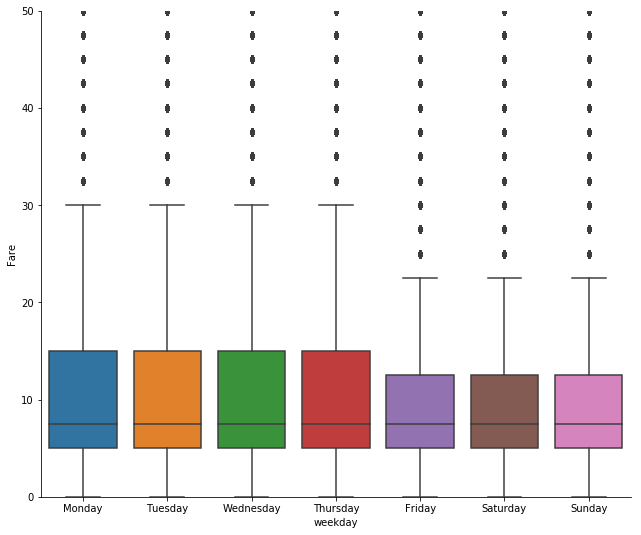

In [24]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday" ]
cx = sns.catplot(x="weekday", y="Fare", kind="box", data=transportation_selected,order=order)
fig = plt.gcf()
fig.set_size_inches(10, 8)
cx.set(ylim = (0,50))
plt.savefig('Trip Fare By Weekday.png')
plt.show()

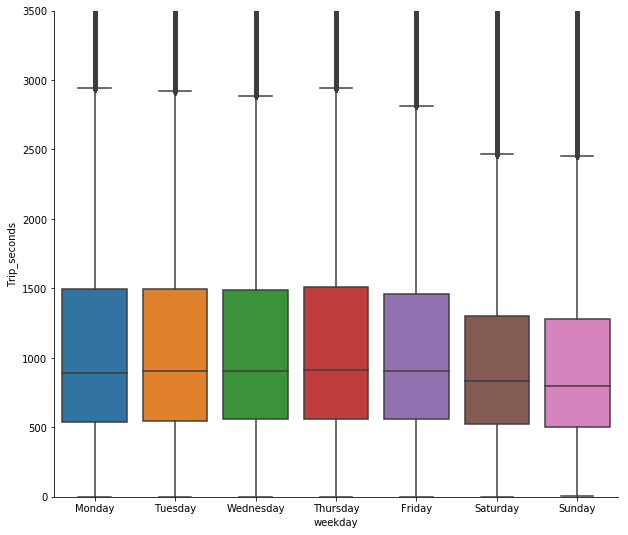

In [25]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday" ]
gx = sns.catplot(x="weekday", y="Trip_seconds", kind="box", data=transportation_selected, order = order)
fig = plt.gcf()
fig.set_size_inches(10, 8)
gx.set(ylim = (0,3500))
plt.savefig('Trip Time By Weekday.png')
plt.show()

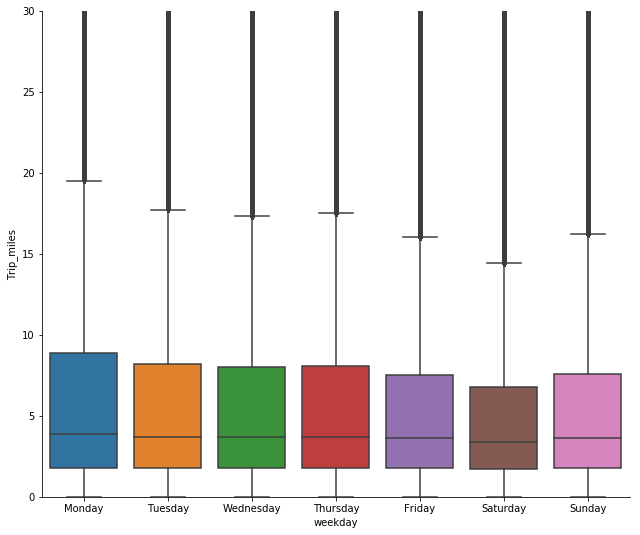

In [26]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday" ]
hx = sns.catplot(x="weekday", y="Trip_miles", kind="box", data=transportation_selected, order = order)
fig = plt.gcf()
fig.set_size_inches(10, 8)
hx.set(ylim = (0,30))
plt.savefig('Trip Miles By Weekday.png')
plt.show()

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

oneway_anova = ols('Fare ~ C(weekday)', data = transportation_selected).fit()
oneway_anova.summary()
with open('fareanova.txt', 'w') as fh:
    fh.write(oneway_anova.summary().as_text())

In [28]:
oneway_anova1 = ols('Trip_seconds ~ C(weekday)', data = transportation_selected).fit()
oneway_anova1.summary()
with open('tripdurationanova.txt', 'w') as fh:
    fh.write(oneway_anova1.summary().as_text())

In [29]:
oneway_anova2 = ols('Trip_miles ~ C(weekday)', data = transportation_selected).fit()
oneway_anova2.summary()
with open('tripdistanceanova.txt', 'w') as fh:
    fh.write(oneway_anova2.summary().as_text())

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


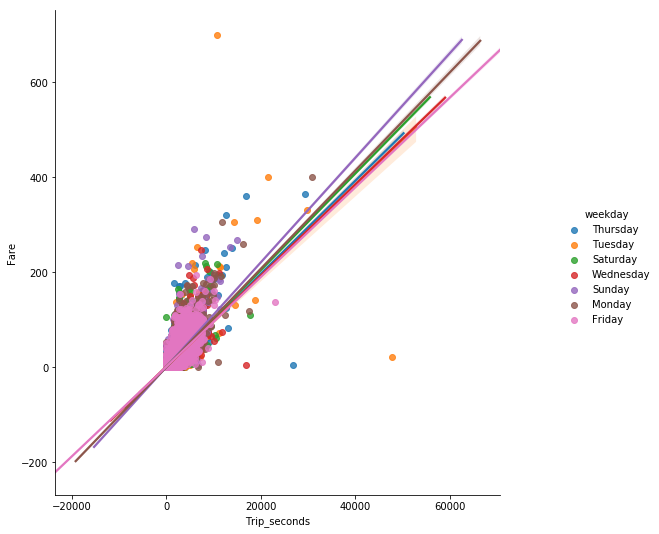

In [30]:
# order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday" ]
dx=sns.lmplot(x="Trip_seconds", y="Fare", hue = 'weekday', data=transportation_selected)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.savefig('Scatter Plot of Trip Time vs Fare against day of week.png')
plt.show()


C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


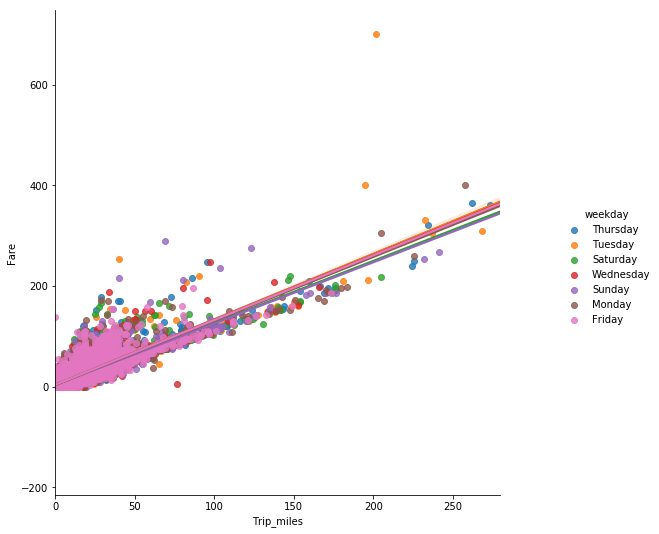

In [31]:
ex=sns.lmplot(x="Trip_miles", y="Fare", hue = 'weekday', data=transportation_selected)
ex.set(xlim = (0,280))
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.savefig('Scatter Plot of Trip Distance vs Fare against day of week.png')
plt.show()


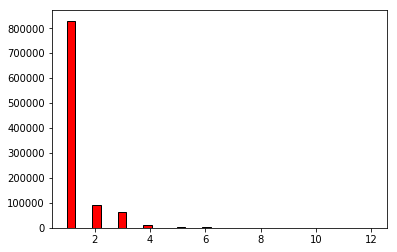

In [32]:
plt.hist(transportation_selected['Trips Pooled'], color = 'red', edgecolor = 'black',
         bins = int(180/5))
plt.savefig('Trip Pooled Count.png')
plt.show()

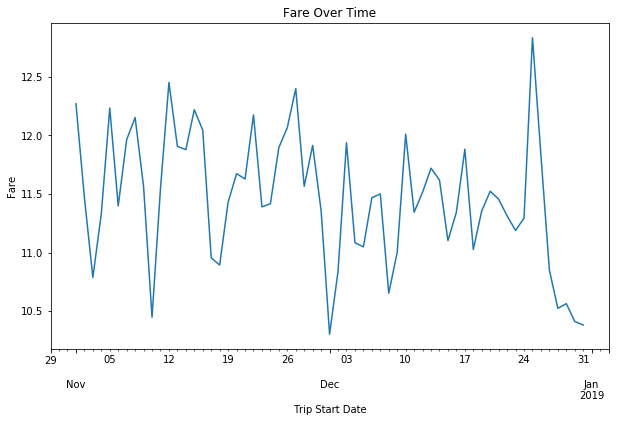

In [33]:
transportation_selected_1 = transportation_selected
transportation_selected_1.index = transportation_selected_1['Trip Start Timestamp']
mx=transportation_selected_1['Fare'].resample('D').mean().plot(title = 'Fare Over Time')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.ylabel('Fare')
plt.xlabel('Trip Start Date')
plt.savefig('Fare Over Time.png')
plt.show()

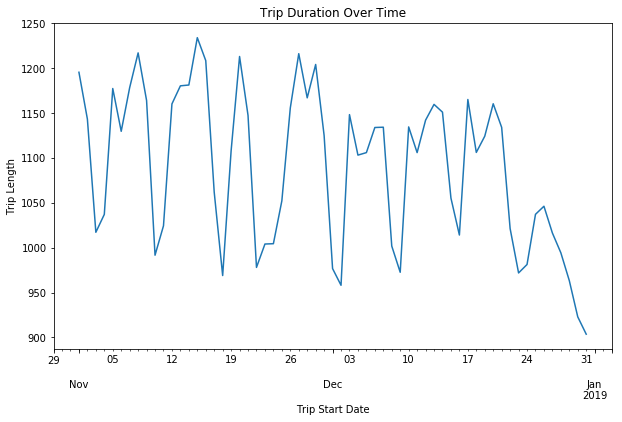

In [34]:
lx=transportation_selected_1['Trip_seconds'].resample('D').mean().plot(title = 'Trip Duration Over Time')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.ylabel('Trip Length')
plt.xlabel('Trip Start Date')
plt.savefig('Trip Duration Over Time.png')
plt.show()

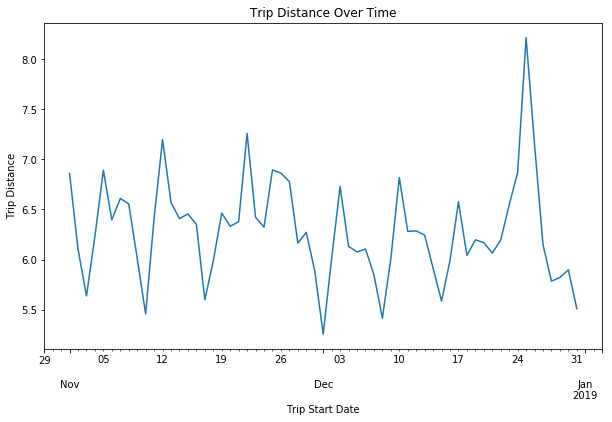

In [35]:
nx=transportation_selected_1['Trip_miles'].resample('D').mean().plot(title = 'Trip Distance Over Time')
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.ylabel('Trip Distance')
plt.xlabel('Trip Start Date')
plt.savefig('Trip Miles Over Time.png')
plt.show()

In [36]:
# Find correlation between two numerical variables fare and trip seconds
fare = transportation_selected['Fare']
transportation_time = transportation_selected['Trip_seconds']
# Calculate the Pearson Correlation Coefficient and its p-value
statistics_result = scipy.stats.pearsonr(fare, transportation_time)
print('The Pearson Correlation Coefficient is: ', statistics_result[0])
print('The p-value is: ', statistics_result[1])


The Pearson Correlation Coefficient is:  0.7850275437258065
The p-value is:  0.0


In [37]:
transportation_distance = transportation_selected['Trip_miles']
statistics_result_1 = scipy.stats.pearsonr(fare, transportation_distance)
print('The Pearson Correlation Coefficient is: ', statistics_result_1[0])
print('The p-value is: ', statistics_result_1[1])


The Pearson Correlation Coefficient is:  0.8929456863732214
The p-value is:  0.0


In [38]:
statistics_result_2 = scipy.stats.pearsonr(transportation_time, transportation_distance)
print('The Pearson Correlation Coefficient is: ', statistics_result_2[0])
print('The p-value is: ', statistics_result_2[1])

The Pearson Correlation Coefficient is:  0.811038944535514
The p-value is:  0.0


In [39]:
#import required module
# Use chi square test to find correlation between two categorical variable 
from scipy.stats import chi2_contingency

# define a function to calculate the Chi-square statistics
def chisq_of_df_cols(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    ctsum = groupsizes.unstack(c1)
    # fillna(0) is necessary to remove any NAs which will cause exceptions
    return(chi2_contingency(ctsum.fillna(0)))
# apply function to state and main_category
chisq_result = chisq_of_df_cols(transportation_selected, 'Shared Trip Authorized', 'weekday')
print('Chi-Square Test value: ', chisq_result[0])
print('p-value: ', chisq_result[1])
print('Degree of Freedom: ', chisq_result[2])

Chi-Square Test value:  3884.097546458115
p-value:  0.0
Degree of Freedom:  6


In [40]:
chisq_result1 = chisq_of_df_cols(transportation_selected, 'Pickup Community Area', 'weekday')
print('Chi-Square Test value: ', chisq_result1[0])
print('p-value: ', chisq_result1[1])
print('Degree of Freedom: ', chisq_result1[2])

Chi-Square Test value:  16563.67007121606
p-value:  0.0
Degree of Freedom:  462


In [41]:
chisq_result2 = chisq_of_df_cols(transportation_selected, 'Dropoff Community Area', 'weekday')
print('Chi-Square Test value: ', chisq_result2[0])
print('p-value: ', chisq_result2[1])
print('Degree of Freedom: ', chisq_result2[2])

Chi-Square Test value:  20776.077464773058
p-value:  0.0
Degree of Freedom:  462


In [42]:
dummy = pd.get_dummies(transportation_selected[['Pickup Community Area', 'Dropoff Community Area','Shared Trip Authorized','weekday' ]])
dummy.head()

,Shared Trip Authorized,Pickup Community Area_0.0,Pickup Community Area_1.0,Pickup Community Area_2.0,Pickup Community Area_3.0,Pickup Community Area_4.0,Pickup Community Area_5.0,Pickup Community Area_6.0,Pickup Community Area_7.0,Pickup Community Area_8.0,...,Dropoff Community Area_75.0,Dropoff Community Area_76.0,Dropoff Community Area_77.0,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-01 08:45:00,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 02:00:00,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 20:15:00,False,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 03:45:00,True,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 17:00:00,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
transportation_dummy = pd.concat([transportation_selected, dummy], axis =1)
transportation_dummy.head()

,Trip Start Timestamp,Trip End Timestamp,Trip_seconds,Trip_miles,Pickup Community Area,Dropoff Community Area,Fare,Shared Trip Authorized,Trips Pooled,weekday,...,Dropoff Community Area_75.0,Dropoff Community Area_76.0,Dropoff Community Area_77.0,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
Trip Start Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-11-01 08:45:00,2018-11-01 08:45:00,2018-11-01 09:30:00,"3,140.00",38.50,0.00,56.00,47.50,False,1,Thursday,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 02:00:00,2018-11-01 02:00:00,2018-11-01 02:15:00,"1,031.00",5.30,70.00,0.00,10.00,False,1,Thursday,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 20:15:00,2018-11-01 20:15:00,2018-11-01 21:15:00,"4,125.00",49.90,8.00,0.00,62.50,False,1,Thursday,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 03:45:00,2018-11-01 03:45:00,2018-11-01 04:15:00,"1,229.00",11.70,22.00,0.00,7.50,True,3,Thursday,...,0,0,0,0,0,0,0,1,0,0
2018-11-01 17:00:00,2018-11-01 17:00:00,2018-11-01 18:00:00,"3,383.00",12.30,0.00,32.00,27.50,False,1,Thursday,...,0,0,0,0,0,0,0,1,0,0


In [44]:
from sklearn.model_selection import train_test_split
X = transportation_dummy[transportation_dummy.columns[~transportation_dummy.columns.isin(['Fare','Trip Start Timestamp', 'Trip End Timestamp','Pickup Community Area',
                                                                                         'Dropoff Community Area','Shared Trip Authorized','weekday' ])]]
y = transportation_dummy.Fare
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [45]:
import statsmodels.api as sm
est = sm.OLS(y, X)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 3.550e+04
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:53:53   Log-Likelihood:            -2.7674e+06
No. Observations:             1000000   AIC:                         5.535e+06
Df Residuals:                  999836   BIC:                         5.537e+06
Df Model:                         163                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Trip_seconds      

In [56]:
X = X[X.columns[~X.columns.isin(['Pickup Community Area_36.0', 'Pickup Community Area_39.0', 'Pickup Community Area_40.0',
                                 'Pickup Community Area_45.0','Pickup Community Area_46.0','Pickup Community Area_48.0',
                                 'Pickup Community Area_49.0','Pickup Community Area_50.0','Pickup Community Area_51.0',
                                 'Pickup Community Area_52.0', 'Pickup Community Area_54.0','Pickup Community Area_55.0',
                                 'Pickup Community Area_57.0','Pickup Community Area_62.0','Pickup Community Area_65.0',
                                 'Pickup Community Area_70.0','Pickup Community Area_73.0','Dropoff Community Area_36.0',
                                 'Dropoff Community Area_39.0','Dropoff Community Area_40.0','Dropoff Community Area_43.0',
                                 'Dropoff Community Area_47.0','Dropoff Community Area_48.0','Dropoff Community Area_50.0',
                                 'Dropoff Community Area_54.0','Dropoff Community Area_55.0','Dropoff Community Area_58.0',
                                 'Dropoff Community Area_60.0','Dropoff Community Area_70.0'])]]
X['Min_Miles Interaction'] = X['Trip_seconds']*X['Trip_miles']
# # Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
                                                                                        

In [62]:
import statsmodels.api as sm
est1 = sm.OLS(y, X)
est3 = est1.fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Fare   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 4.233e+04
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:37:46   Log-Likelihood:            -2.7664e+06
No. Observations:             1000000   AIC:                         5.533e+06
Df Residuals:                  999862   BIC:                         5.535e+06
Df Model:                         137                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Trip_seconds      

In [57]:
# OSL
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = model.predict(X_test)
print(predictions[0:5])

[15.05572243 16.81557804  6.16684381  7.56014239  6.86502382]


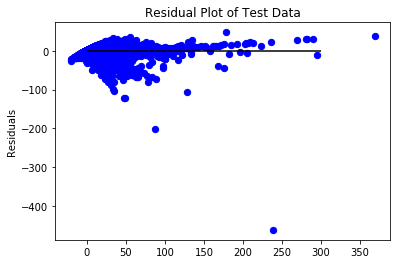

In [58]:
plt.scatter(predictions, predictions - y_test, c= 'b', s = 40)
plt.hlines(y = 0, xmin  = 0, xmax = 300)
plt.title('Residual Plot of Test Data')
plt.ylabel('Residuals')
plt.savefig('Residual Plot.png')
plt.show()


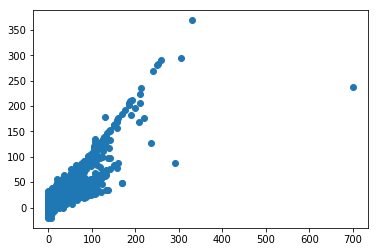

In [73]:
## The line / model
plt.scatter(y_test, predictions)
plt.savefig('Prediction vs Test Actual.png')
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, predictions))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(y_test, predictions))

print('Score: %.3f' % model.score(X_test, y_test))

Mean squared error: 15.248
Variance score: 0.852
Score: 0.852


In [69]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=10, normalize=False)
ridge_model = ridgeReg.fit(X_train,y_train)
ridge_pred = ridge_model.predict(X_test)
print(ridge_pred[0:5])


[15.05181415 16.81399523  6.16677847  7.56013973  6.86447051]


In [70]:
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, ridge_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(y_test, ridge_pred))

print('Score: %.3f' % ridge_model.score(X_test, y_test))

Mean squared error: 15.248
Variance score: 0.852
Score: 0.852


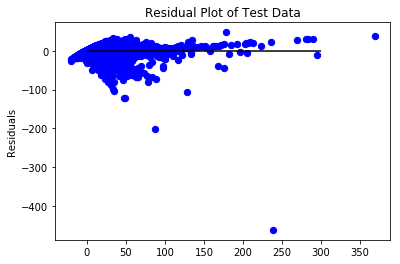

In [74]:
plt.scatter(ridge_pred, ridge_pred - y_test, c= 'b', s = 40)
plt.hlines(y = 0, xmin  = 0, xmax = 300)
plt.title('Residual Plot of Test Data')
plt.ylabel('Residuals')
plt.savefig('Residual Plot Ridge.png')
plt.show()

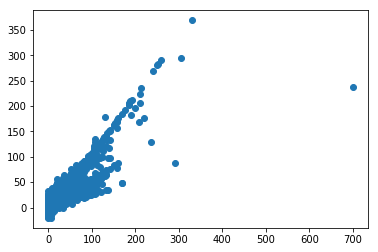

In [76]:
## The line / model
plt.scatter(y_test, ridge_pred)
plt.savefig('Prediction vs Test Actual Ridge.png')
plt.show()

In [67]:
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [68]:
print(reg.alpha_)

10.0


In [71]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=0.01, l1_ratio=0.5, normalize=False)
EN_model = ENreg.fit(X_train,y_train)
EN_pred = EN_model.predict(X_test)
print(EN_pred[0:5])

[14.57473215 16.96485613  6.06197083  7.51876875  6.66083319]


In [72]:
# The mean squared error
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, EN_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.3f' % r2_score(y_test, EN_pred))

print('Score: %.3f' % EN_model.score(X_test, y_test))

Mean squared error: 15.306
Variance score: 0.852
Score: 0.852


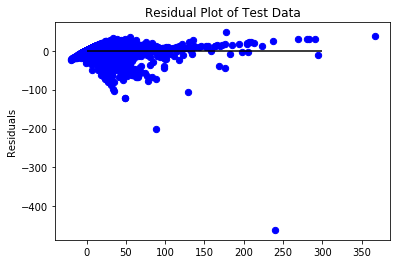

In [75]:
plt.scatter(EN_pred, EN_pred - y_test, c= 'b', s = 40)
plt.hlines(y = 0, xmin  = 0, xmax = 300)
plt.title('Residual Plot of Test Data')
plt.ylabel('Residuals')
plt.savefig('Residual Plot EN.png')
plt.show()

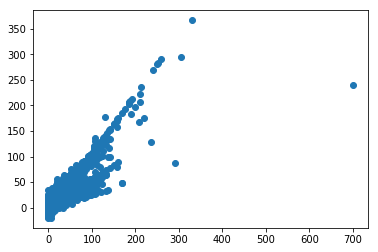

In [77]:
## The line / model
plt.scatter(y_test, EN_pred)
plt.savefig('Prediction vs Test Actual EN.png')
plt.show()

In [155]:
from sklearn.linear_model import ElasticNetCV
regEN = ElasticNetCV(cv=10, random_state=0)
regEN.fit(X_train,y_train)
print(regEN.alpha_)
print(regEN.intercept_) 

12.42121603798045
1.47998217479058
